In [2]:
from radionets.simulations.gaussians import create_grid, gaussian_source
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [3]:
g = create_grid(300,1)
print(g.shape)

(1, 3, 300, 300)


In [4]:
def create_gauss(img, N, sources, source_list, img_size=63, diffuse = False, bboxes = False, mosaic = False):

    mos = 1
    if mosaic:
             mos = 10
    mx = np.random.randint(1, img_size*mos, size=(N, sources))
    my = np.random.randint(1, img_size*mos, size=(N, sources))

    if diffuse:
         amp = (
            np.random.randint(30, 40, size=(N))# * 1 / 10 * np.random.randint(3, 5)
            ) #/ 1e2
         sx = np.random.randint((img_size**2)/200, (img_size**2)/100, size=(N, sources))*10
         sy = sx
    else:    
        amp = (
        np.random.randint(50, 100, size=(N))# * 1 / 10 * np.random.randint(5, 10)
        )# / 1e2
        sx = np.random.randint((img_size**2)/720, (img_size**2)/360, size=(N, sources))
        sy = sx
    # Doesnt work properly right now
    #if spherical:
    #    sx = np.random.randint(3, 8, size=(N, sources))
    #    sy = sx
    #else:
    #    sx = np.random.randint(1, 15, size=(N, sources))
    #    sy = np.random.randint(1, 15, size=(N, sources))
    #    theta = np.random.randint(0, 360, size=(N, sources))

    s = np.zeros((N, sources, 1))  # changed from 5
    for i in range(N):
        for j in range(sources):
            g = gauss(img_size*mos, mx[i, j], my[i, j], sx[i, j], sy[i, j], amp[i]) #DPG
            # s[i,j] = np.array([mx[i,j],my[i,j],sx[i,j],sy[i,j],amp[i]])
            s[i, j] = np.array([mx[i, j]])
            #if spherical:
            img[i] += g
            #else:
            #    # rotation around center of the source
            #    padX = [g.shape[0] - mx[i, j], mx[i, j]]
            #    padY = [g.shape[1] - my[i, j], my[i, j]]
            #    imgP = np.pad(g, [padY, padX], "constant")
            #    imgR = ndimage.rotate(imgP, theta[i, j], reshape=False)
            #    imgC = imgR[padY[0] : -padY[1], padX[0] : -padX[1]]
            #    img[i] += imgC
    if source_list:
        return img, s
    elif bboxes:
        return img/amp, [mx[0][0],my[0][0]], [sx[0][0],sy[0][0]]  
    else:
        return img
    
def gauss(img_size, mx, my, sx, sy, amp=0.01):
    x = np.arange(img_size)[None].astype(np.float)
    y = x.T
    return amp * np.exp(-((y - my) ** 2) / sy).dot(np.exp(-((x - mx) ** 2) / sx))

In [5]:
a = create_gauss(g,1,1, False, img_size = 300)

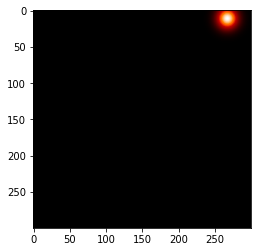

In [6]:
plt.imshow(a[0][0],cmap = 'gist_heat')

In [7]:
def create_jet(img, bboxes = False):
    
    img_size = img.shape[2]
    
    center = img_size//2
    theta = np.random.randint(0, 2*np.pi)
    comps = np.random.randint(3, 6)
    
    coord = []
    x = np.zeros(comps)
    y = np.zeros(comps)
    amp = np.zeros(comps)
    sx = np.zeros(comps)
    sy = np.zeros(comps)
    rot_mat = np.array(
        [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    )
    base_amp = np.random.randint(50, 100)
    
    sides = np.random.randint(1, 2)
    for i in range(comps):
        coord.append(np.array([2*i*img_size*0.05+np.random.randint(-0.01*img_size, 0.01*img_size),0]))
        c[0][0] = 0
        x[i], y[i] = (coord[i] @ rot_mat)+center
        amp[i] = (
        base_amp/(0.5*i**(1.09)+1))
        sx[i] = np.random.randint((img_size**2)/720, (img_size**2)/360)*(0.5*i+1)
        sy[i] = np.random.randint((img_size**2)/720, (img_size**2)/360)*(0.5*i+1)
    if sides == 1:
        print('ay caramba')
        comps += comps - 1
        amp = np.append(amp, amp[1:])
        x = np.append(x, -x[1:]+img_size)
        y = np.append(y, -y[1:]+img_size)
        sx = np.append(sx, sx[1:])
        sy = np.append(sy, sy[1:])
        print(x)       
    x_curve = np.zeros(comps)
    y_curve = np.zeros(comps)    
    for i in range(comps):
        if i!=0:
            x_curve[i] = np.random.randint(x_curve[i-1],0.05*img_size+x_curve[i-1])
            y_curve[i] = np.random.randint(y_curve[i-1],0.05*img_size+y_curve[i-1])
        x[i]+=x_curve[i]
        y[i]+=y_curve[i]
        g = gauss(img_size, x[i], y[i], sx[i], sy[i], amp[i])
        img += g
        #print(amp[i])
        #print(coord[i])
    return img

ay caramba
[151.97998499 120.3002251   92.5804352   62.8806603   29.22091541
 179.6997749  207.4195648  237.1193397  270.77908459]


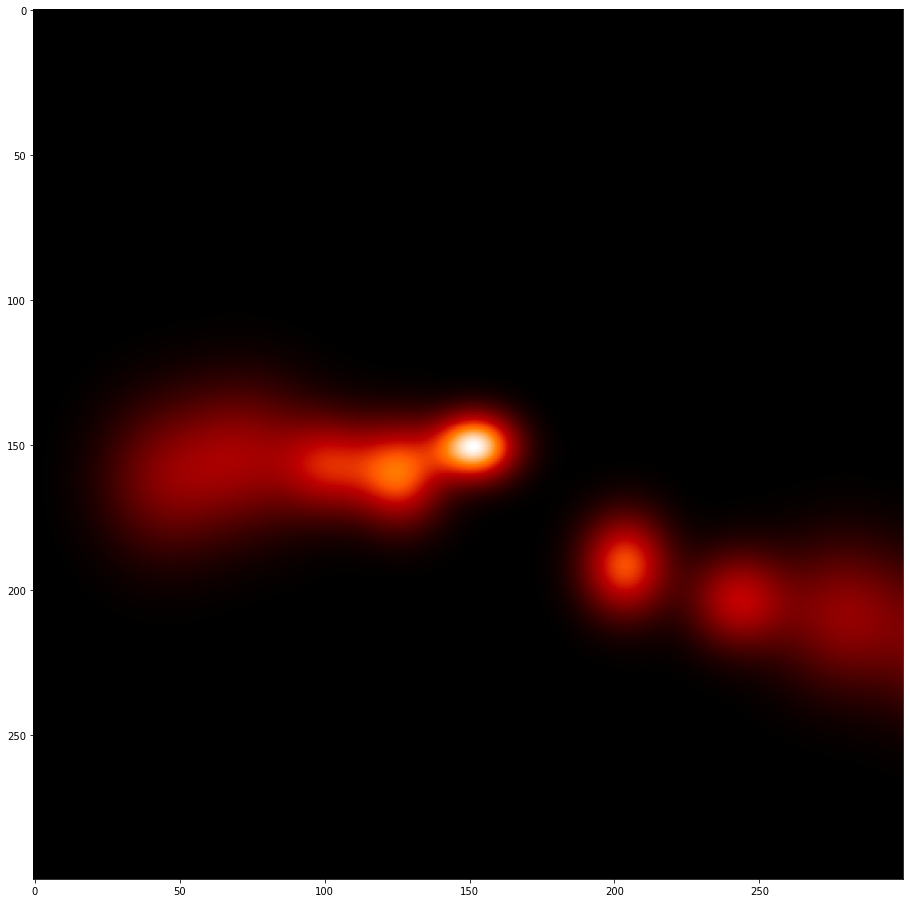

In [12]:
g = create_grid(300,1)
jet = create_jet(g)
figure(figsize=(24,16))
#plt.contour(jet[0][0])
plt.imshow(jet[0][0],cmap = 'gist_heat')

In [9]:
theta = 0#-np.pi/2
comps = 4
img_size = 300
c = []
x = np.zeros(comps)
y = np.zeros(comps)
rot_mat = np.array(
        [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    )
for i in range(comps):
    c.append(np.array([i*5,0]))
    x[i], y[i] = (c[i] @ rot_mat)+img_size//2

In [10]:
print(x)
print(y)

[150. 155. 160. 165.]
[150. 150. 150. 150.]


In [11]:
t = np.array